In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#### Load in data

In [2]:
mushrooms = pd.read_csv("mushrooms.csv")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploratory data analysis
#### Make plots comparing feature distribution between poisonous and edible classes.

<Figure size 432x288 with 0 Axes>

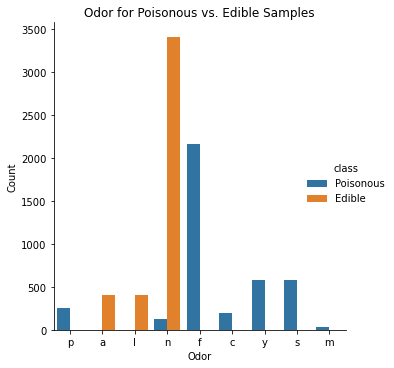

In [3]:
plt.figure()
g = sns.catplot(x="odor", hue = "class", data = mushrooms, kind = "count")
g.set_axis_labels("Odor", "Count")

axes = g.axes.flatten()
axes[0].set_title("Odor for Poisonous vs. Edible Samples")

g.legend.texts[0].set_text("Poisonous")
g.legend.texts[1].set_text("Edible")

plt.show()

<Figure size 432x288 with 0 Axes>

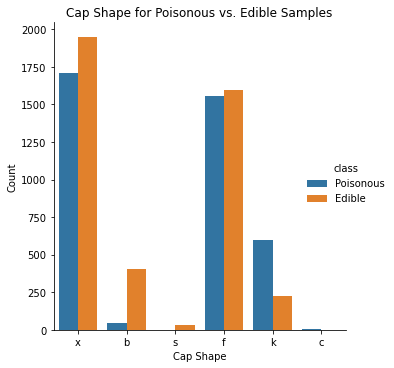

In [4]:
plt.figure()
g = sns.catplot(x="cap-shape", hue = "class", data = mushrooms, kind = "count")
g.set_axis_labels("Cap Shape", "Count")

axes = g.axes.flatten()
axes[0].set_title("Cap Shape for Poisonous vs. Edible Samples")

g.legend.texts[0].set_text("Poisonous")
g.legend.texts[1].set_text("Edible")

plt.show()

<Figure size 432x288 with 0 Axes>

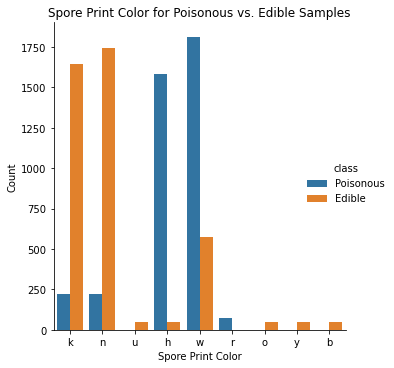

In [5]:
plt.figure()
g = sns.catplot(x="spore-print-color", hue = "class", data = mushrooms, kind = "count")
g.set_axis_labels("Spore Print Color", "Count")

axes = g.axes.flatten()
axes[0].set_title("Spore Print Color for Poisonous vs. Edible Samples")

g.legend.texts[0].set_text("Poisonous")
g.legend.texts[1].set_text("Edible")

plt.show()

#### Exploratory data analysis conclusion
It appears that odor and spore print color are among the best features to distinguish edibility, so we'll use these two features in our modeals.

### Data pre-processing
The following python script one-hot encodes the odor and spore print color features. The new dataframe to be used is "mushrooms_new" We then implement an 75-25 train-test split and will use 5-fold cross-validation.

In [6]:
%run making_dummies.py

In [7]:
mushrooms_new.head()

,edible,spore_print_color_black,spore_print_color_brown,spore_print_color_purple,spore_print_color_chocolate,spore_print_color_white,spore_print_color_green,spore_print_color_orange,spore_print_color_yellow,spore_print_color_buff,odor_pungent,odor_almond,odor_anise,odor_none,odor_foul,odor_creosote,odor_fishy,odor_spicy,odor_musty
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [8]:
x = mushrooms_new.drop(['edible'], axis = 1)
y = mushrooms_new['edible']
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, random_state = 0, test_size = .25)
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

### Naive Bayes model

In [9]:
nb = GaussianNB()

nb.fit(x_train,y_train)
NBpreds = nb.predict(x_test)

#### NB test accuracy

In [10]:
accuracy_score(y_test,NBpreds)

0.9891678975873953

### Logistic regression model

In [11]:
grid_cv = GridSearchCV(LogisticRegression(),
                          param_grid = {'C':range(1,2)},
                          scoring = 'accuracy',
                          cv = 5)

grid_cv.fit(x_train,y_train)
grid_cv.best_params_

{'C': 1}

In [12]:
LR = LogisticRegression(C = 1)
LR.fit(x_train,y_train)
LRpreds = LR.predict(x_test)

#### LR test accuracy

In [13]:
accuracy_score(y_test, LRpreds)

0.9950763170851797

### Decision tree model

In [14]:
grid_cv = GridSearchCV(DecisionTreeClassifier(),
                          param_grid = {'max_depth':range(1,6)},
                          scoring = 'accuracy',
                          cv = 5)

grid_cv.fit(x_train,y_train)
grid_cv.best_params_

{'max_depth': 3}

In [15]:
mtree = DecisionTreeClassifier(max_depth = 3)
mtree.fit(x_train, y_train)
DTpreds = mtree.predict(x_test)

### DT test accuracy

In [16]:
accuracy_score(y_test,DTpreds)

0.9950763170851797

## Model selection conclusion
The decision tree and logistic regression models give the best test accuracy. Due to the nature of the models, we choose to analyze the decision tree model further to provide further conclusions.

## DT model analysis

In [17]:
print(export_text(mtree, feature_names = list(x_test.columns)))

|--- odor_none <= 0.50
|   |--- odor_anise <= 0.50
|   |   |--- odor_almond <= 0.50
|   |   |   |--- class: 0
|   |   |--- odor_almond >  0.50
|   |   |   |--- class: 1
|   |--- odor_anise >  0.50
|   |   |--- class: 1
|--- odor_none >  0.50
|   |--- spore_print_color_green <= 0.50
|   |   |--- spore_print_color_white <= 0.50
|   |   |   |--- class: 1
|   |   |--- spore_print_color_white >  0.50
|   |   |   |--- class: 1
|   |--- spore_print_color_green >  0.50
|   |   |--- class: 0



### Decision tree summary
* Anise or almond odor => EDIBLE
* Any other odor => POISONOUS 
* Odorless and green spore print => POISONOUS
* Odorless and any other spore print color => EDIBLE

#### Errors made by decision tree

In [18]:
Tree_errors = []
for i in range(len(DTpreds)):
    if DTpreds[i] != y_test.iloc[i]:
        Tree_errors.append(y_test.index[i])

In [19]:
mushrooms_new.iloc[Tree_errors]

,edible,spore_print_color_black,spore_print_color_brown,spore_print_color_purple,spore_print_color_chocolate,spore_print_color_white,spore_print_color_green,spore_print_color_orange,spore_print_color_yellow,spore_print_color_buff,odor_pungent,odor_almond,odor_anise,odor_none,odor_foul,odor_creosote,odor_fishy,odor_spicy,odor_musty
4494,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5964,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5224,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4826,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7706,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5935,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7600,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5332,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5783,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5085,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


Note that all the samples for which the DT misclassified are
* poisnous
* have white spore prints
* are odorless